1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


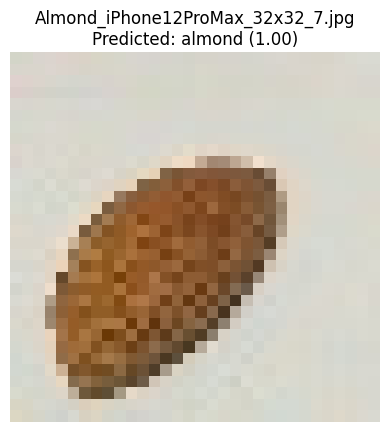

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


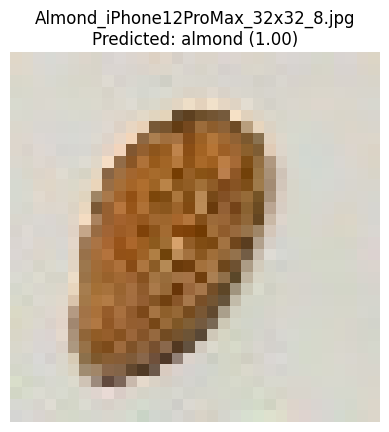

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


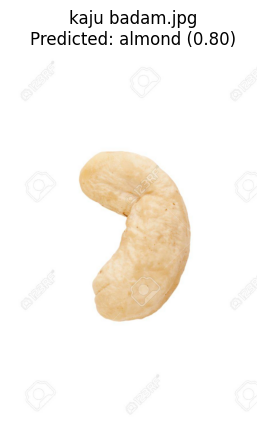

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


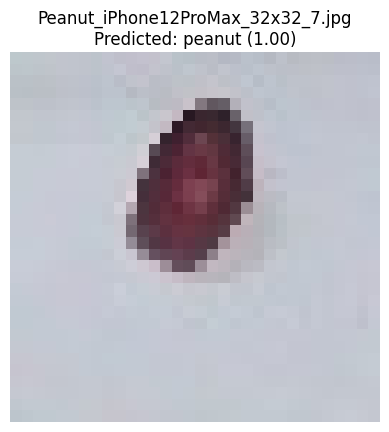

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


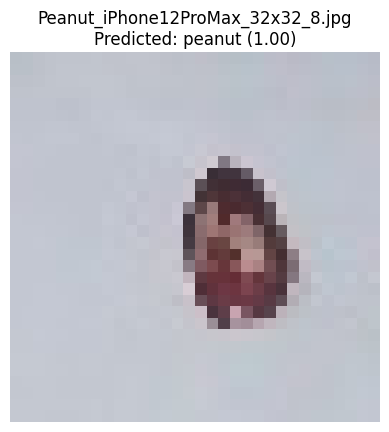

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


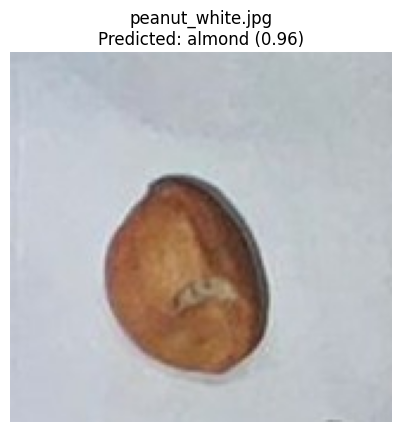

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# 1️⃣ Load the trained model
model = tf.keras.models.load_model("almond_peanut_cnn_model.h5")

# 2️⃣ Folder containing test images
test_folder = "test_images"
class_names = ["almond", "peanut"]
img_size = (32, 32)

# 3️⃣ Loop through all images in the folder
for filename in os.listdir(test_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        img_path = os.path.join(test_folder, filename)

        # Load and preprocess image
        img = image.load_img(img_path, target_size=img_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0

        # Predict
        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions)
        confidence = np.max(predictions)

        # Display
        plt.imshow(image.load_img(img_path))
        plt.axis("off")
        plt.title(f"{filename}\nPredicted: {class_names[predicted_class]} ({confidence:.2f})")
        plt.show()
